# EDA,FE and Classification Model(Wine Quality Dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#for Q-Q plot
import scipy.stats as stats

#Machine Learning Libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#getting unique values for quality feature
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
#getting count of record for each quality feature
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking duplicated values
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#re-checking duplicate values
df.duplicated().sum()

0

In [9]:
#checking different value counts
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [10]:
#getting info about numerical feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#getting correlation between dependent & independent feature
corr = round(df.corr(),2)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.14,-0.10,0.67,-0.69,0.19,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.02,0.25,-0.26,-0.20,-0.40
citric acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.36,-0.55,0.33,0.11,0.23
residual sugar,0.11,-0.00,0.14,1.00,0.03,0.16,0.20,0.32,-0.08,-0.01,0.06,0.01
chlorides,0.09,0.06,0.21,0.03,1.00,0.00,0.05,0.19,-0.27,0.39,-0.22,-0.13
free sulfur dioxide,-0.14,-0.02,-0.05,0.16,0.00,1.00,0.67,-0.02,0.06,0.05,-0.08,-0.05
total sulfur dioxide,-0.10,0.07,0.05,0.20,0.05,0.67,1.00,0.08,-0.08,0.04,-0.22,-0.18
density,0.67,0.02,0.36,0.32,0.19,-0.02,0.08,1.00,-0.36,0.15,-0.50,-0.18
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.36,1.00,-0.21,0.21,-0.06
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.15,-0.21,1.00,0.09,0.25


# Getting Continous & Discrete Feature

In [13]:
numerical_fea = df.columns
print(numerical_fea)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [14]:
#getting count of unique values in numerical fea
for fea in numerical_fea:
    print("'{}' has '{}' unique values".format(fea,df[fea].nunique()))

'fixed acidity' has '96' unique values
'volatile acidity' has '143' unique values
'citric acid' has '80' unique values
'residual sugar' has '91' unique values
'chlorides' has '153' unique values
'free sulfur dioxide' has '60' unique values
'total sulfur dioxide' has '144' unique values
'density' has '436' unique values
'pH' has '89' unique values
'sulphates' has '96' unique values
'alcohol' has '65' unique values
'quality' has '6' unique values


<AxesSubplot:xlabel='quality', ylabel='count'>

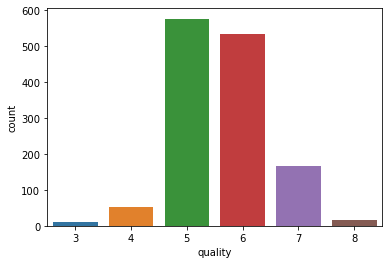

In [15]:
##visualising count of quality which is discrete fea
sns.countplot(data=df,x='quality')

In [16]:
##getting list of continous fea as only discrete fea is quality
continous_fea = [fea for fea in numerical_fea if df[fea].nunique()>6]
print(continous_fea)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


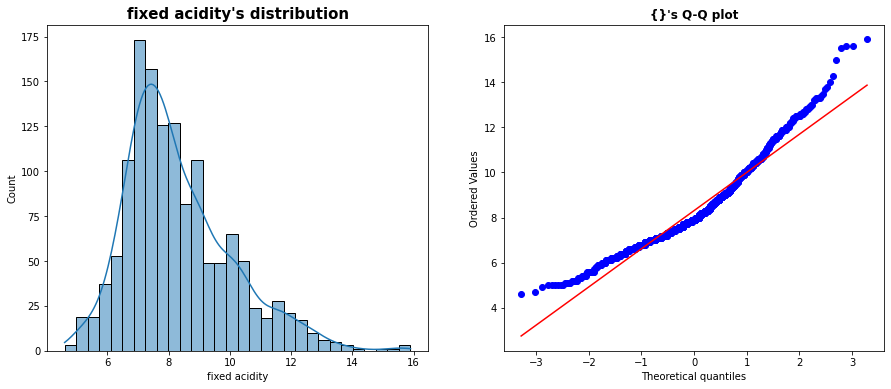

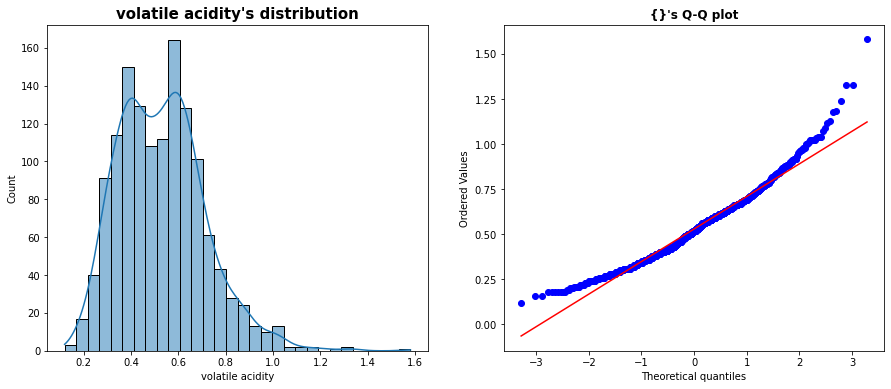

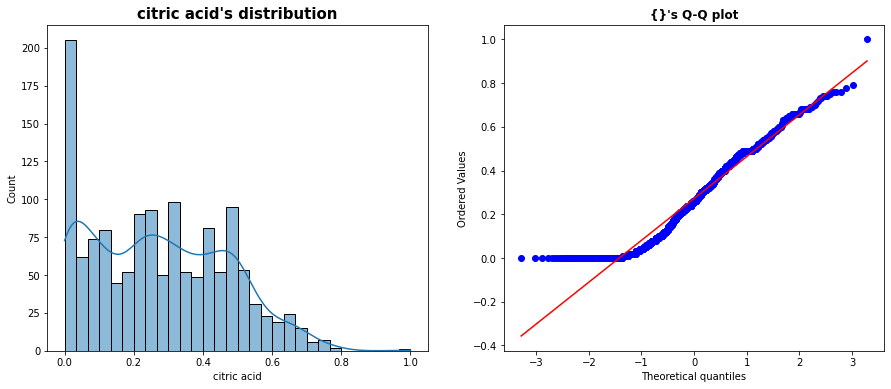

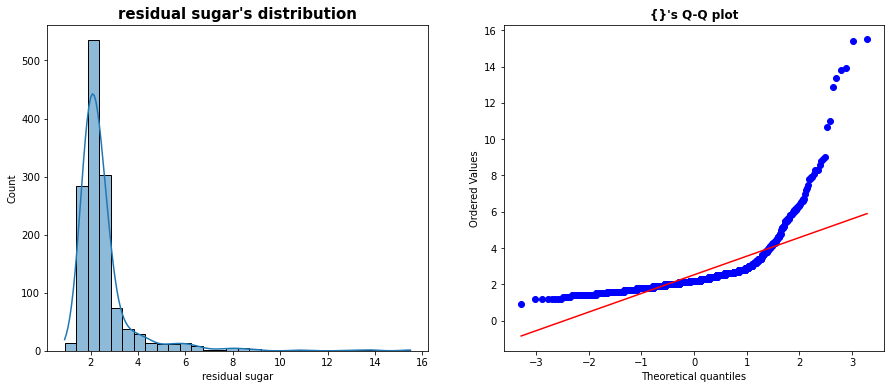

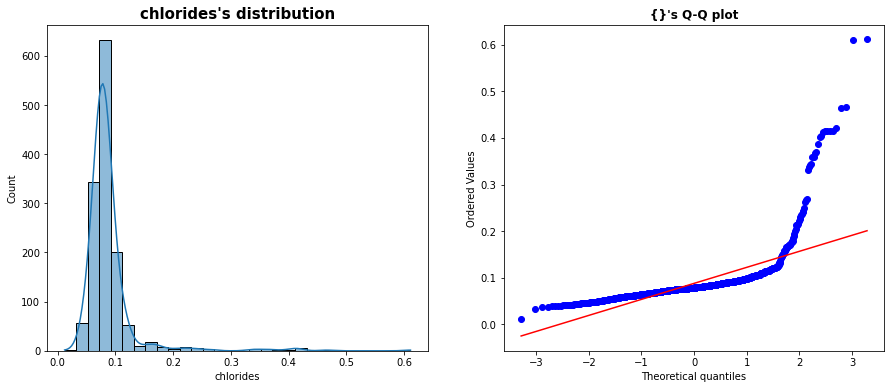

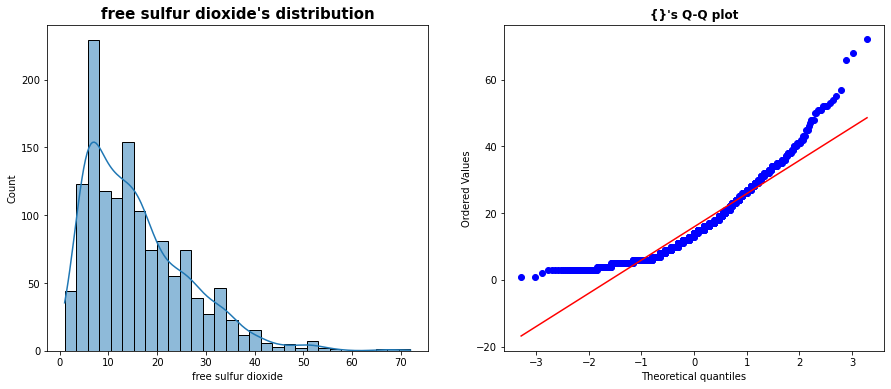

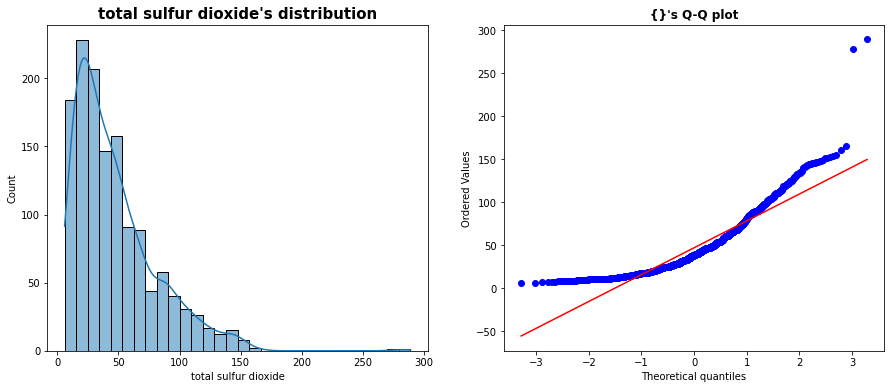

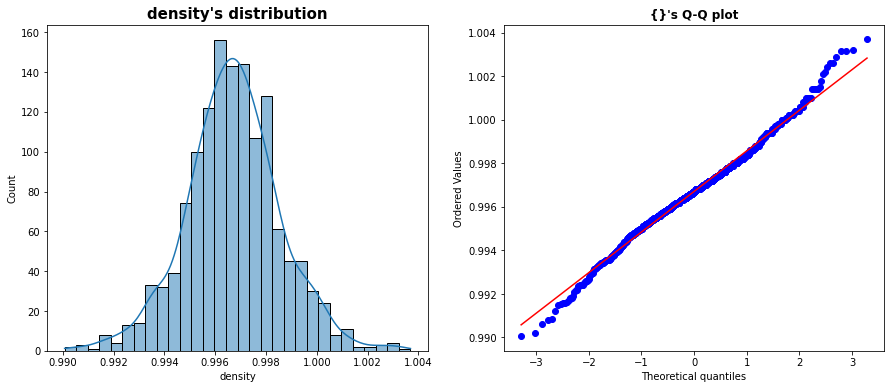

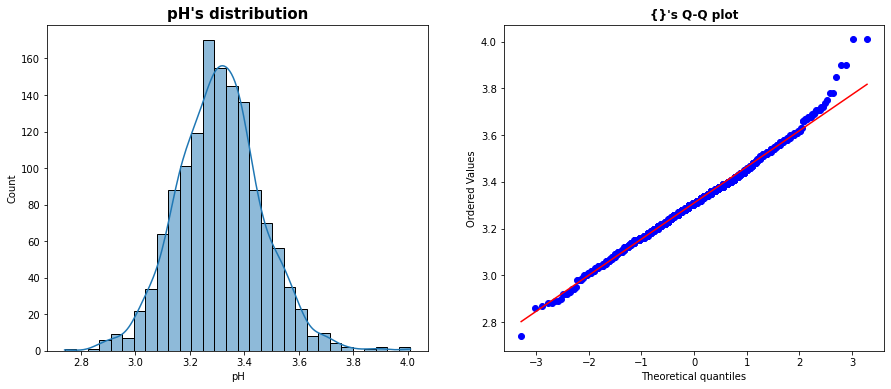

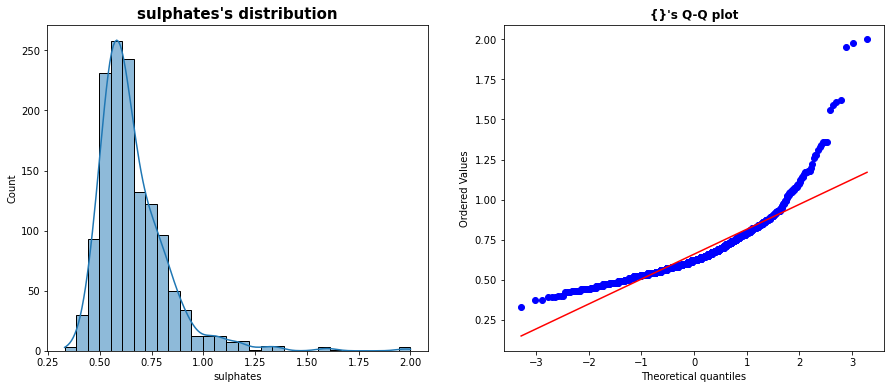

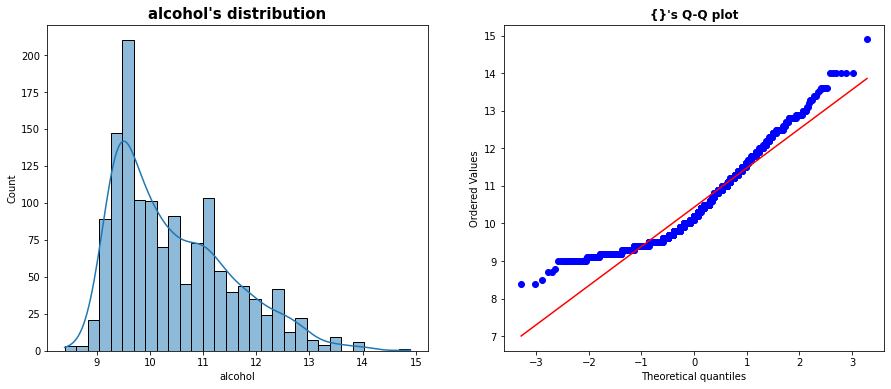

In [17]:
for i in continous_fea:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight='bold',fontsize=15)
    
    plt.subplot(122)
    stats.probplot(df[i],dist='norm',plot=plt)
    plt.title("{}'s Q-Q plot",fontweight='bold')

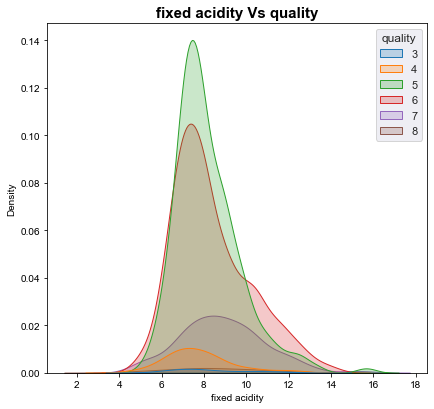

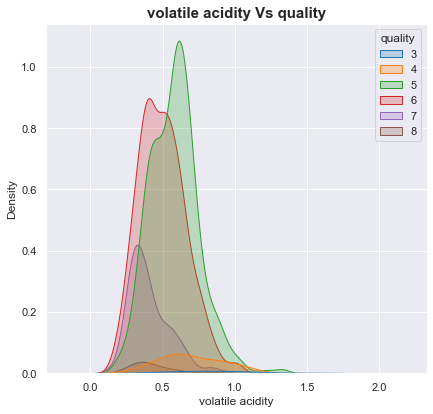

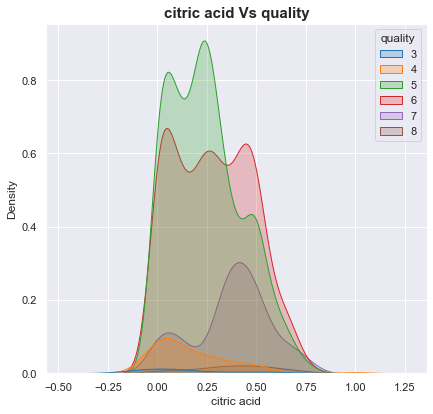

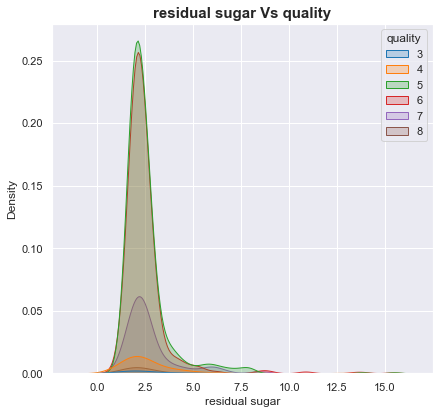

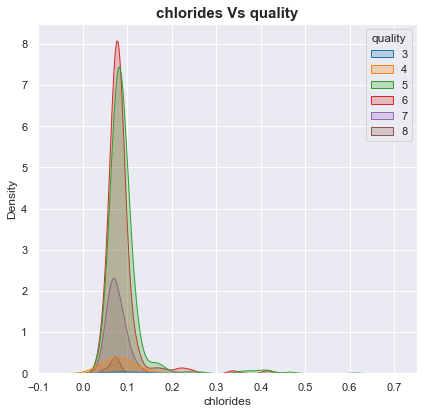

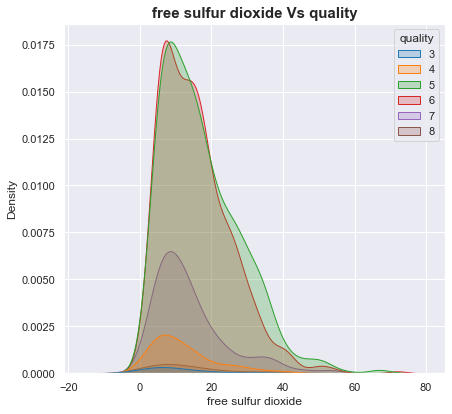

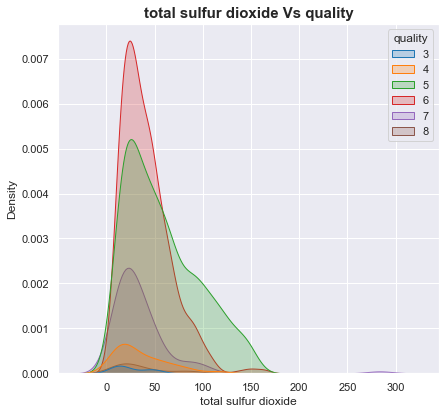

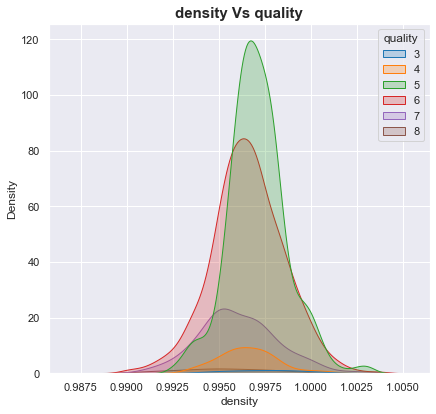

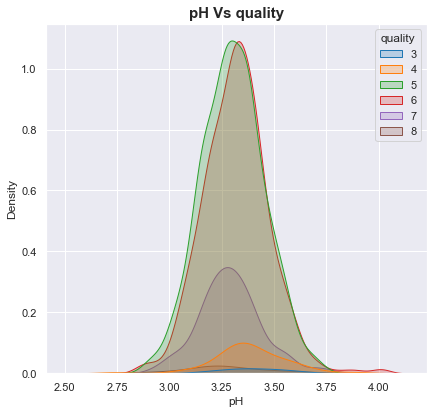

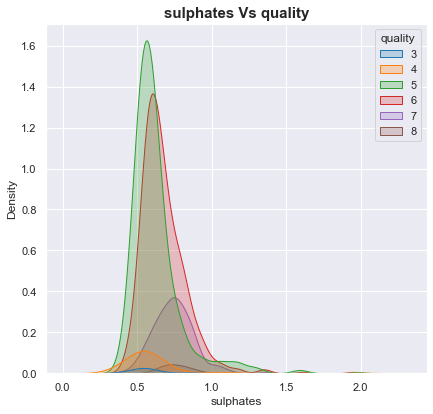

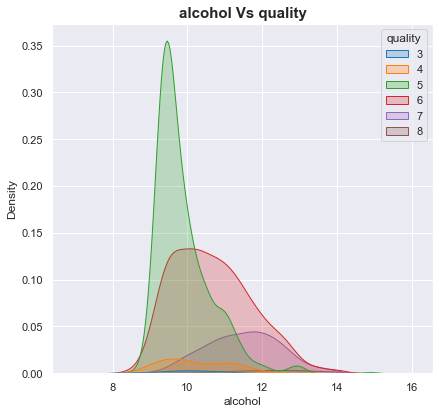

In [18]:
#comparing continous numerical fea with quality feature
palette1 = sns.color_palette("tab10",6)
for fea in enumerate(continous_fea):
    plt.figure(figsize=(15,45))
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.kdeplot(data=df,x=fea[1],hue='quality',palette=palette1,fill=True)
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')
    plt.show()

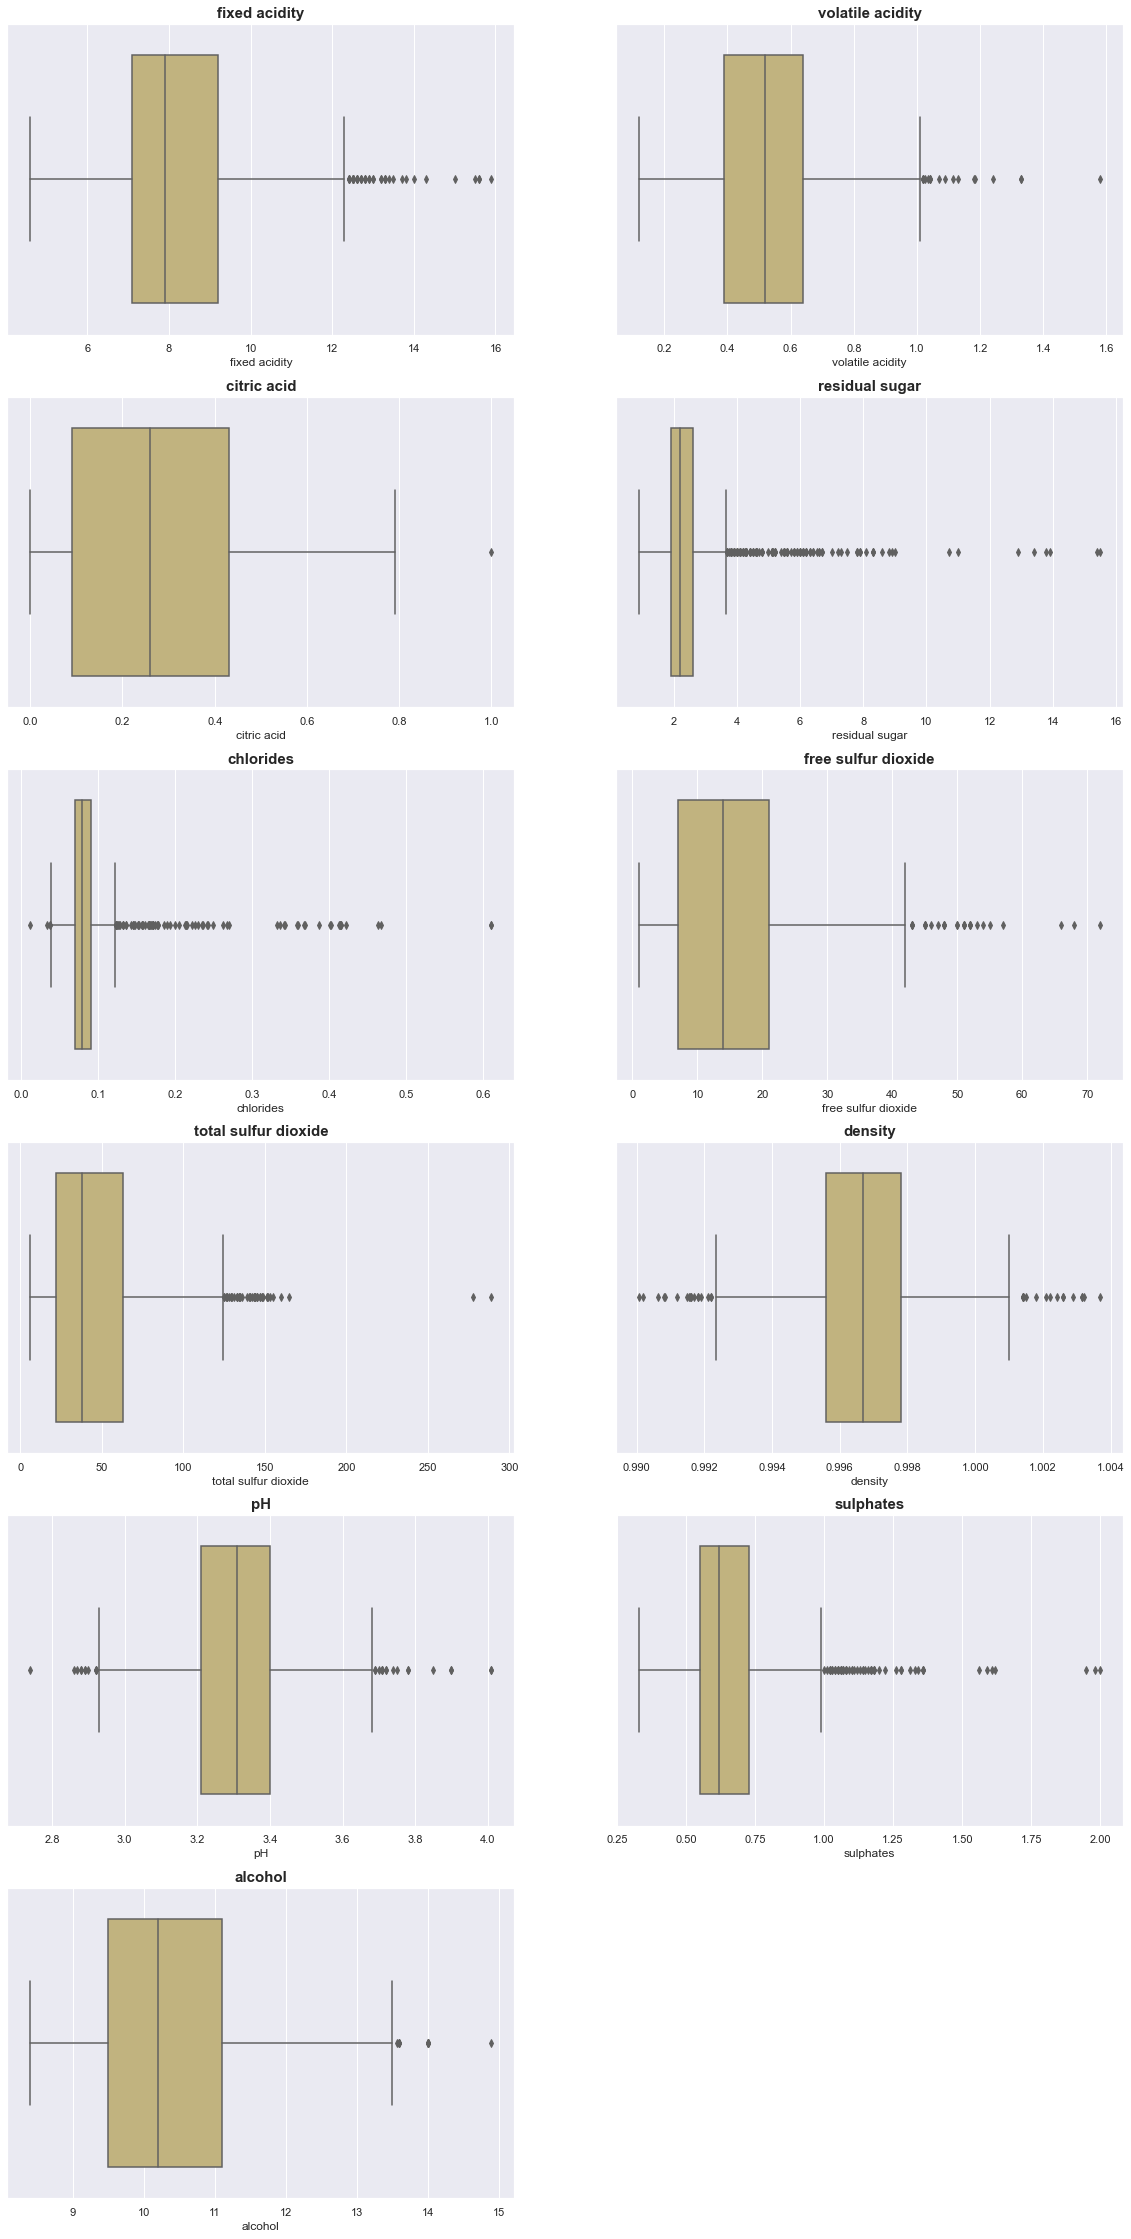

In [19]:
#checking outliers in numerical feature
plt.figure(figsize=(20,40))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.boxplot(data=df,x=fea[1],color='y')
    plt.title("{}".format(fea[1]),fontsize=15,fontweight='bold')

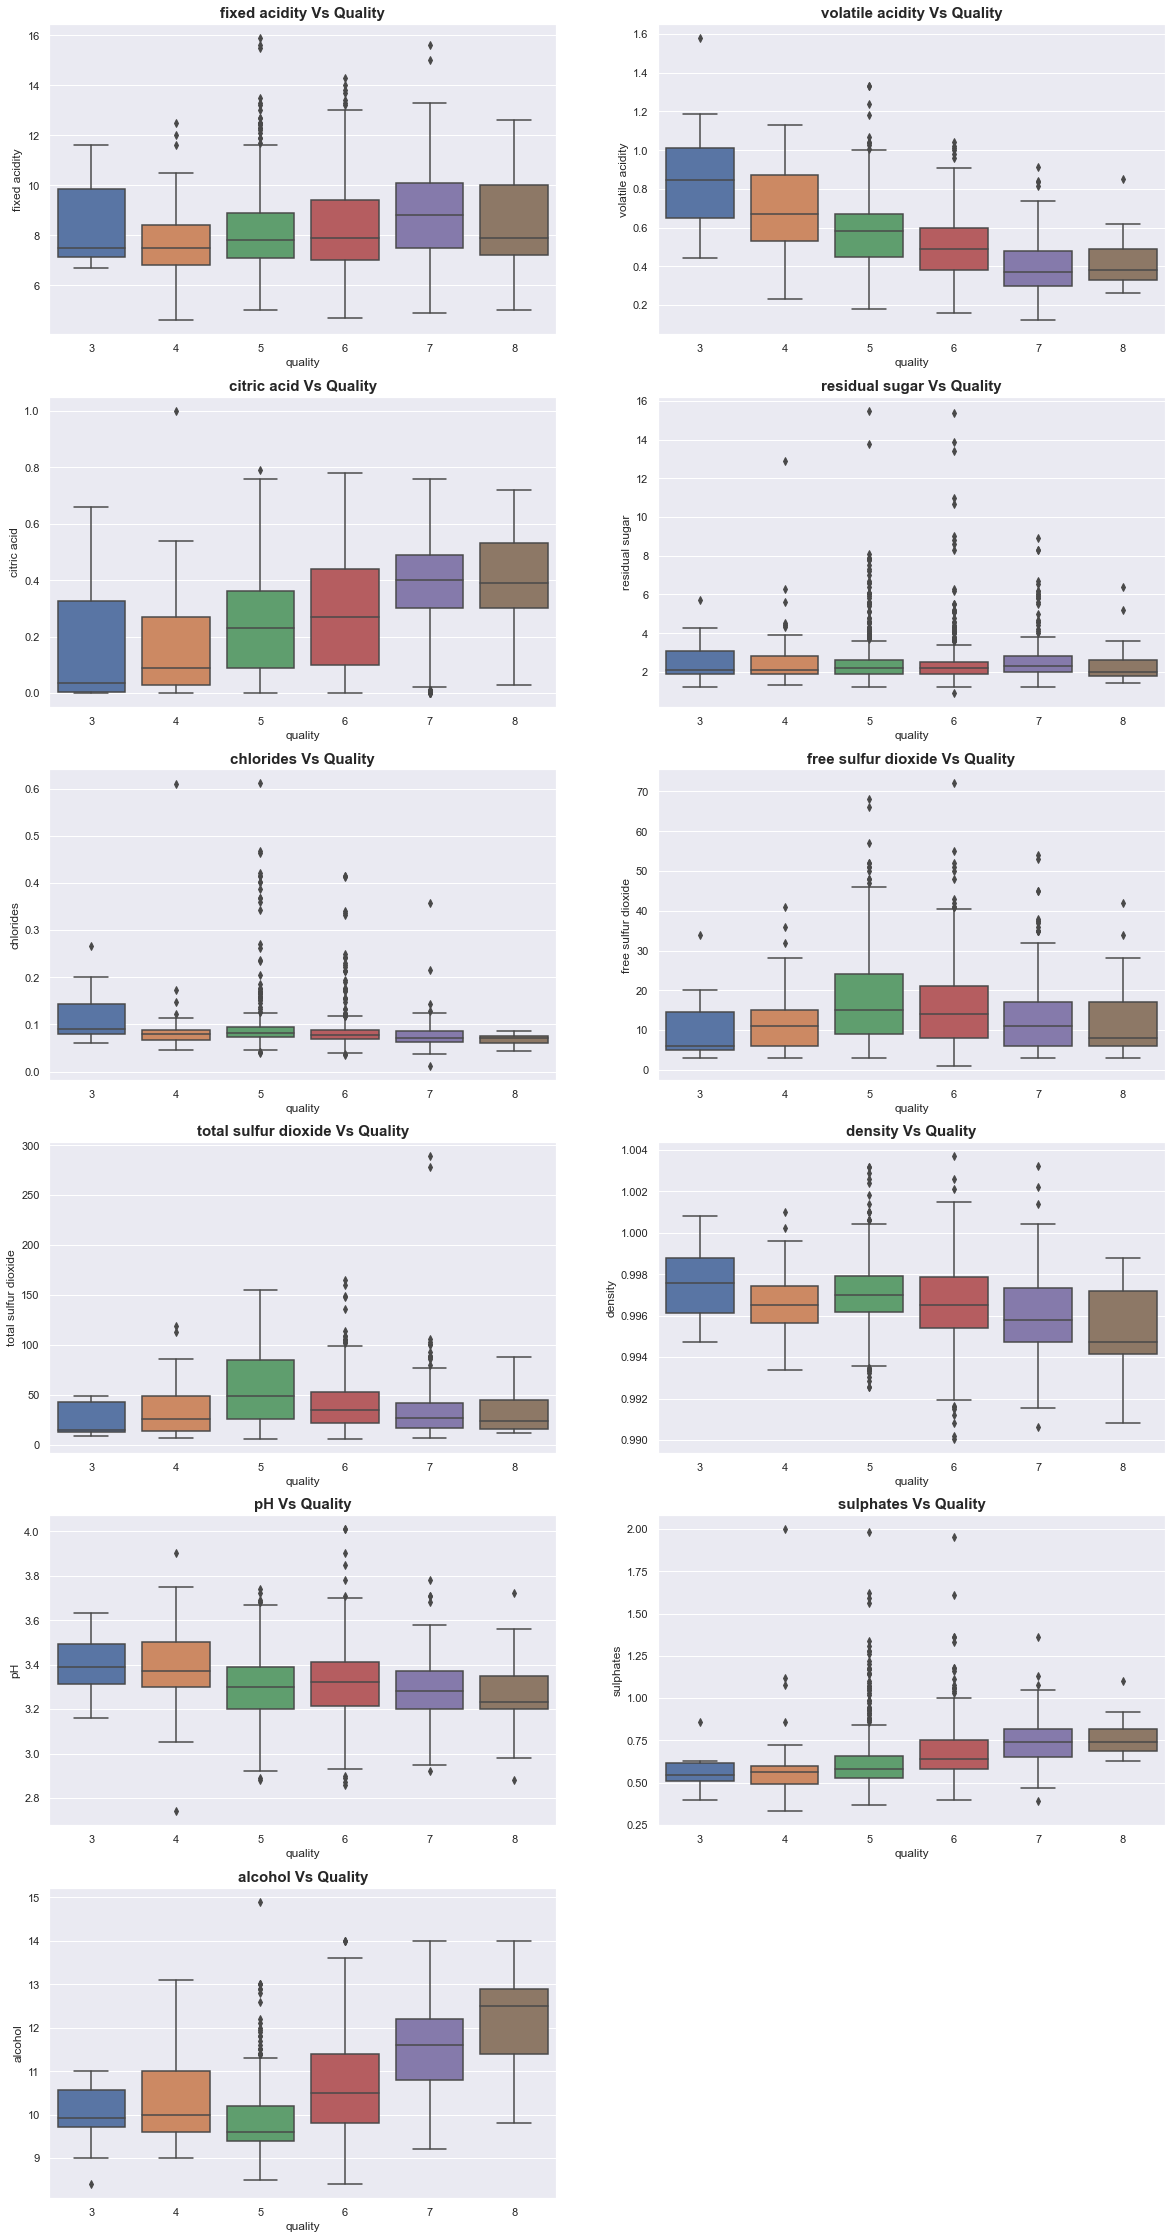

In [20]:
#getting outliers in feature for each unique value in quality feature
plt.figure(figsize=(20,40))
for fea in enumerate(continous_fea):
    plt.subplot(6,2, fea[0]+1)
    sns.set(rc={'figure.figsize':(10,7)})
    sns.boxplot(data=df,y=fea[1],x='quality')
    plt.title("{} Vs Quality".format(fea[1]),fontsize=15,fontweight='bold')

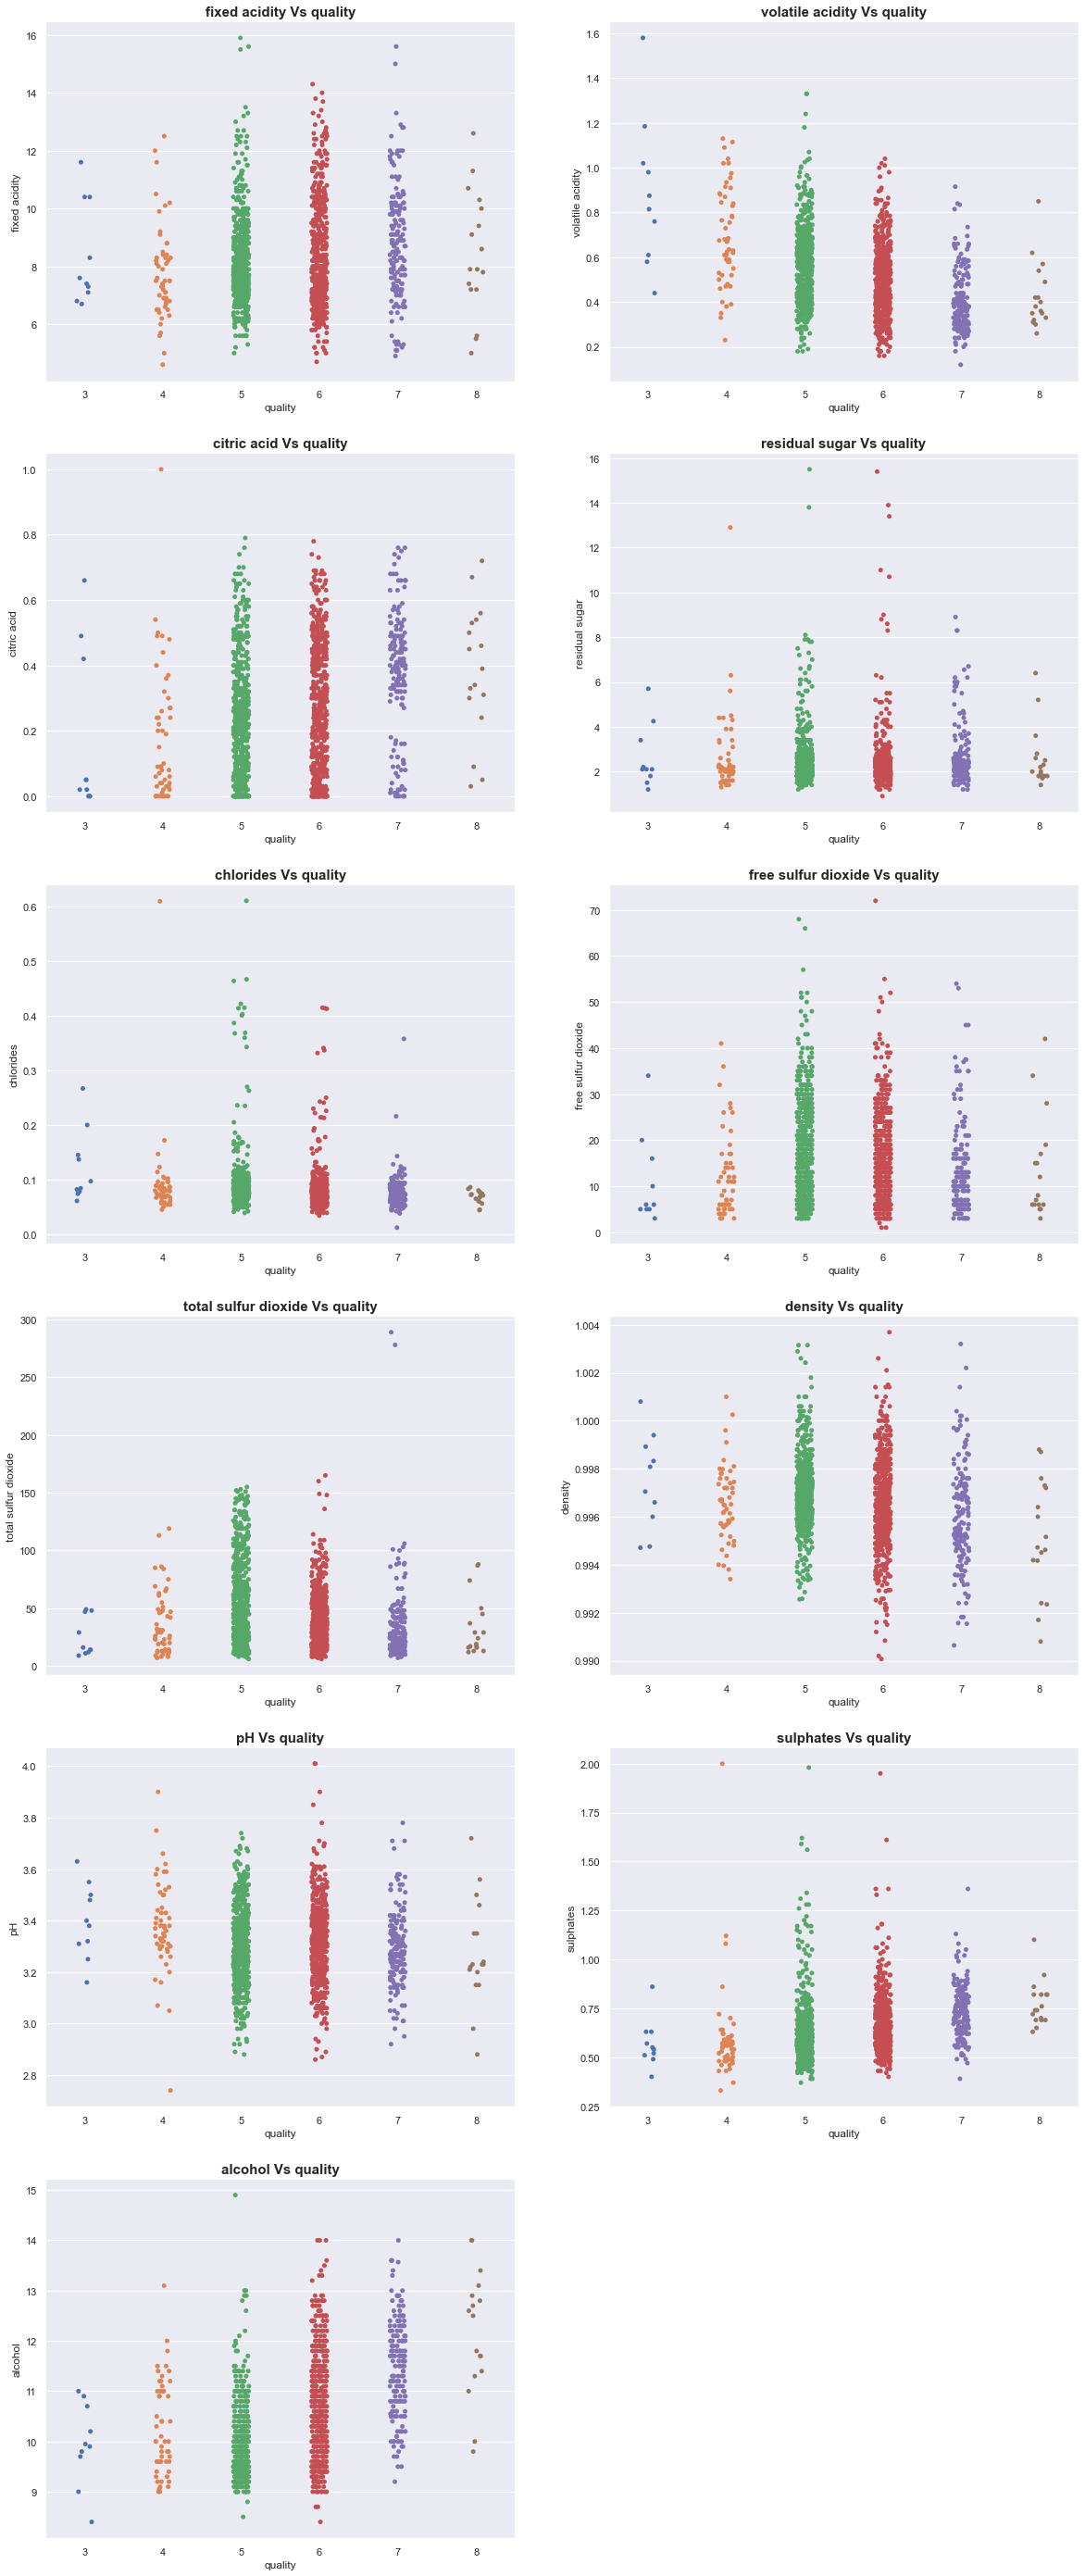

In [21]:
#visualising data scatter in each continous feature with respect to quality
plt.figure(figsize=(20,50))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(10,7)})
    sns.stripplot(data=df,y=fea[1],x='quality')
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')

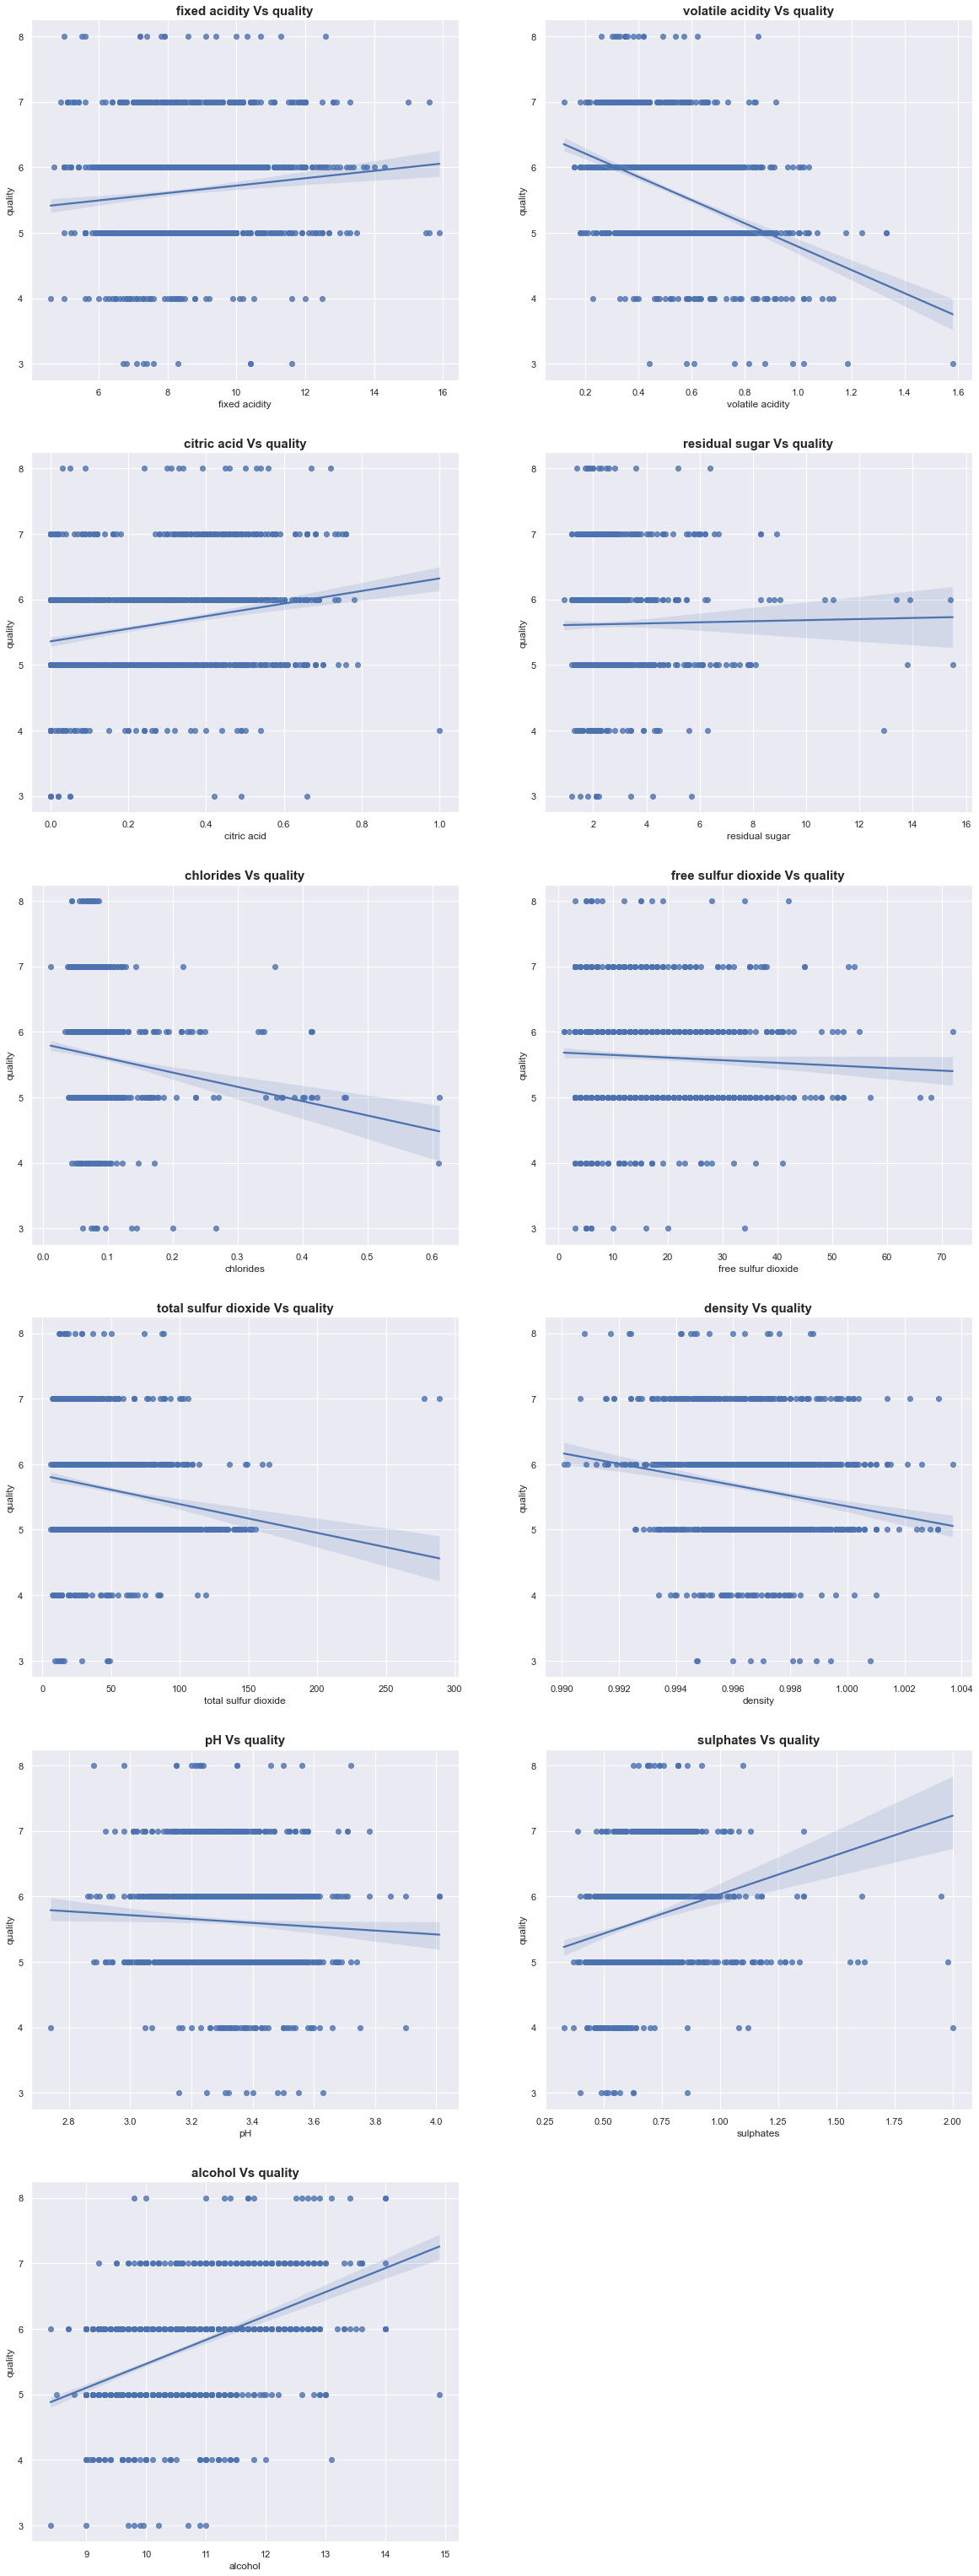

In [22]:
##plotting regplot for feature Vs Modified quality
plt.figure(figsize=(20,55))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(10,7)})
    sns.regplot(data=df,x=fea[1],y='quality')
    plt.xlabel(fea[1])
    plt.ylabel('quality')
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')

In [23]:
#masking rare categories having values less than 20 percent as anew category
frequencies = df['quality'].value_counts(normalize=True)
mapping = df['quality'].map(frequencies)
df['quality'] = df['quality'].mask(mapping<0.2,9)

In [24]:
df['quality'].value_counts()

5    577
6    535
9    247
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

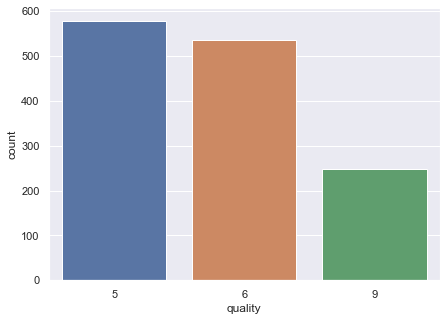

In [27]:
#visualising modified quality
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=df,x='quality')

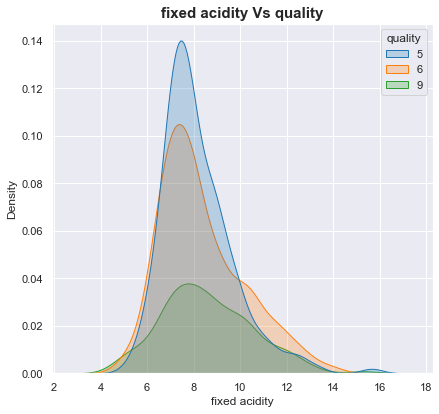

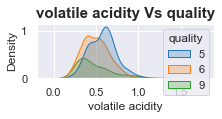

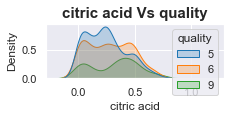

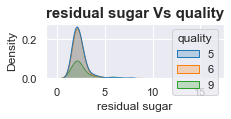

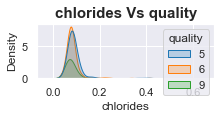

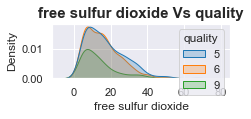

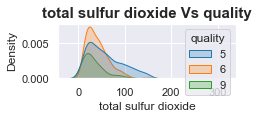

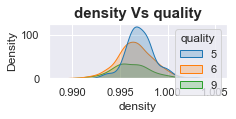

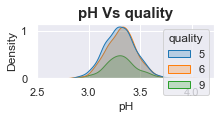

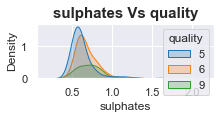

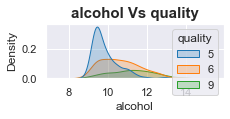

In [28]:
#comparing continous numerical feature with modified quality
palette1 = sns.color_palette('tab10',3)
plt.figure(figsize=(15,45))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.kdeplot(data=df,x=fea[1],hue='quality',palette=palette1,fill=True)
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')
    plt.show()

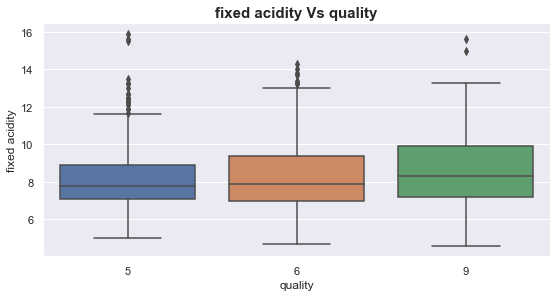

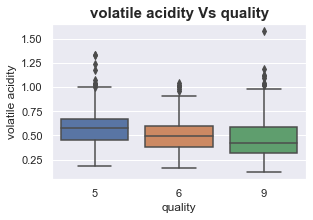

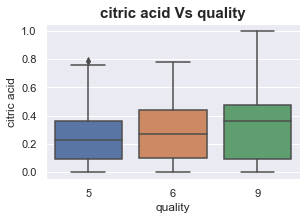

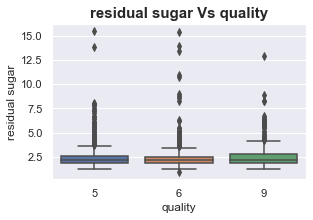

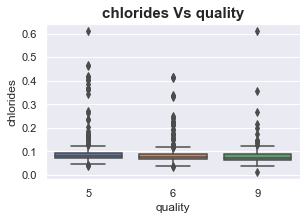

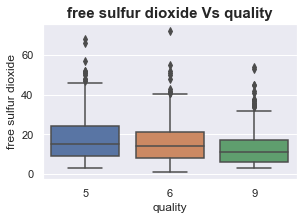

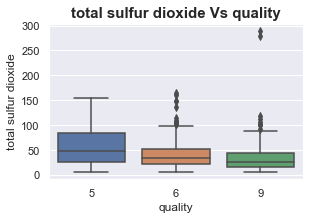

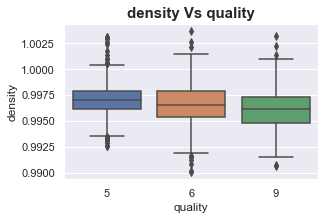

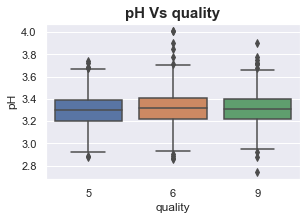

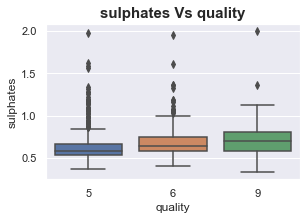

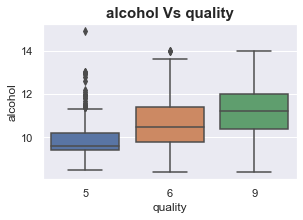

In [33]:
#getting outliers in features for each unique value in modified quality feature
plt.figure(figsize=(20,30))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(10,20)})
    sns.boxplot(data=df,x='quality',y=fea[1])
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')
    plt.show()

In [34]:
corr = round(df.corr(),2)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.14,-0.10,0.67,-0.69,0.19,-0.06,0.08
volatile acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.02,0.25,-0.26,-0.20,-0.17
citric acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.36,-0.55,0.33,0.11,0.14
residual sugar,0.11,-0.00,0.14,1.00,0.03,0.16,0.20,0.32,-0.08,-0.01,0.06,0.05
chlorides,0.09,0.06,0.21,0.03,1.00,0.00,0.05,0.19,-0.27,0.39,-0.22,-0.09
free sulfur dioxide,-0.14,-0.02,-0.05,0.16,0.00,1.00,0.67,-0.02,0.06,0.05,-0.08,-0.12
total sulfur dioxide,-0.10,0.07,0.05,0.20,0.05,0.67,1.00,0.08,-0.08,0.04,-0.22,-0.23
density,0.67,0.02,0.36,0.32,0.19,-0.02,0.08,1.00,-0.36,0.15,-0.50,-0.17
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.36,1.00,-0.21,0.21,0.02
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.15,-0.21,1.00,0.09,0.17


<AxesSubplot:>

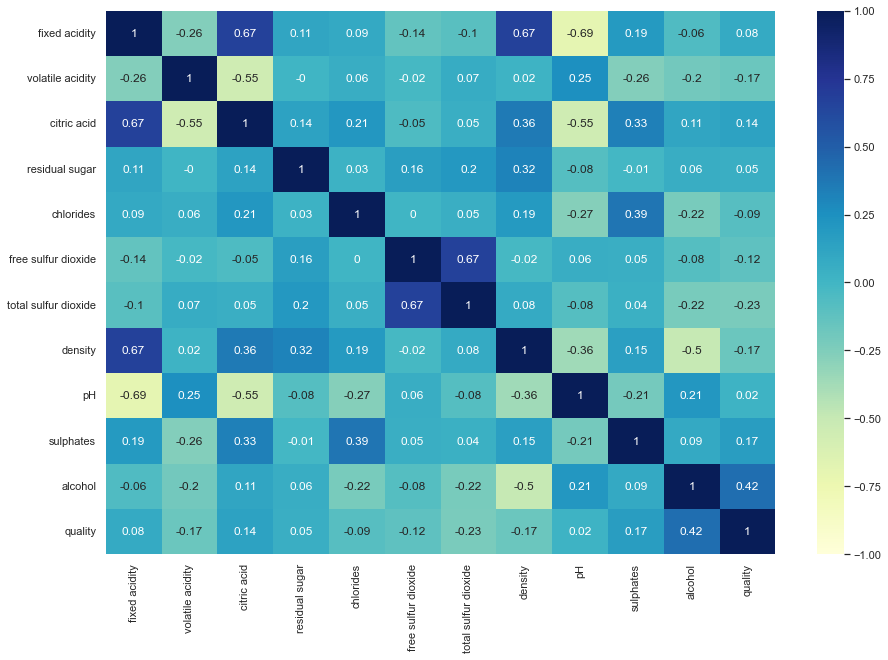

In [36]:
#plotting heatmap for visualising the correlation between the feature
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')

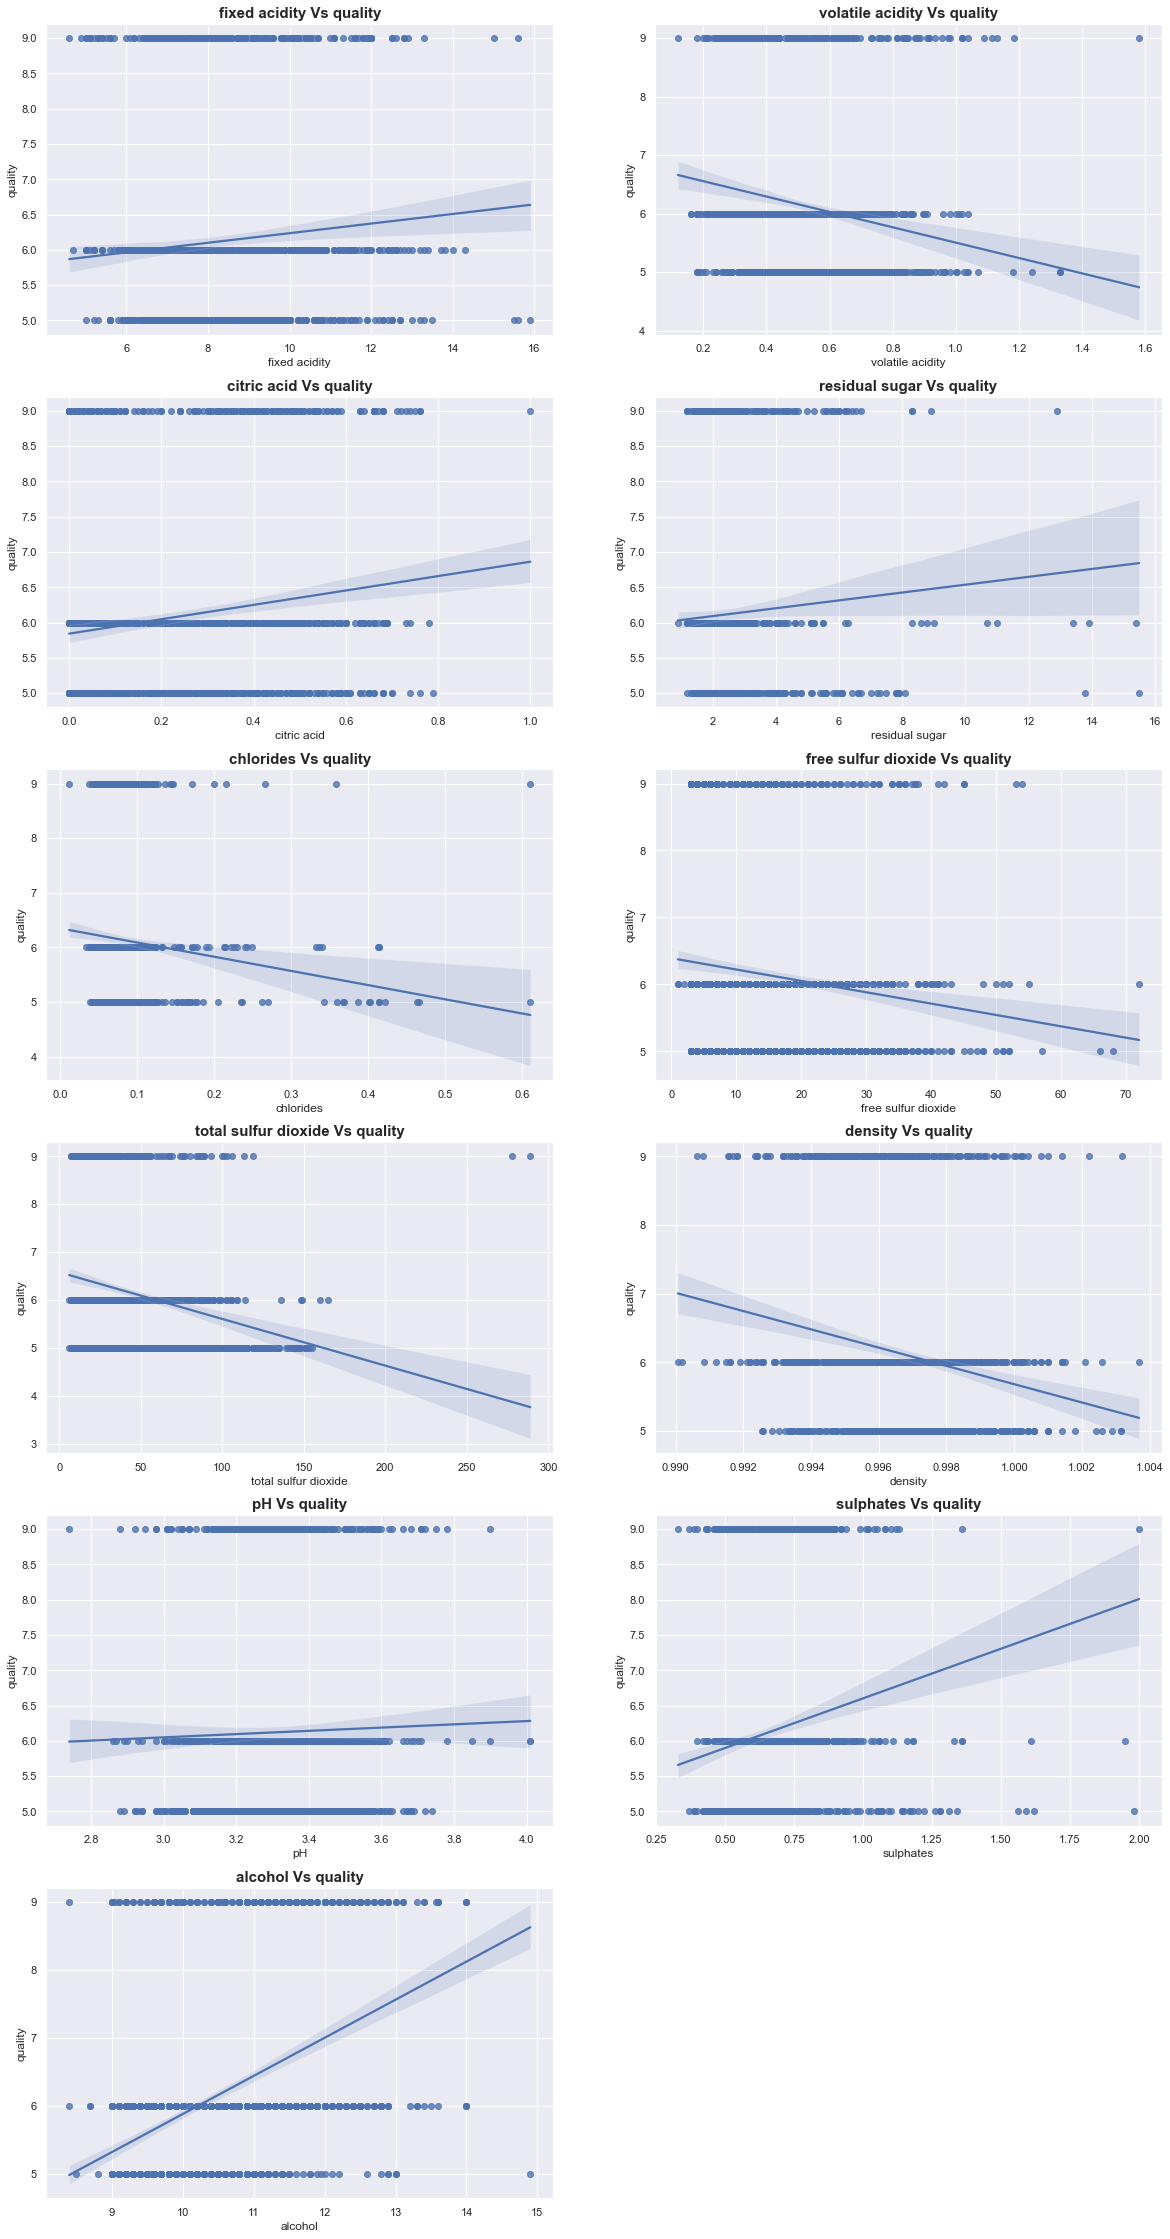

In [38]:
#plotting regplot for feature Vs Modified feature
plt.figure(figsize=(20,40))
for fea in enumerate(continous_fea):
    plt.subplot(6,2,fea[0]+1)
    sns.set(rc={'figure.figsize':(10,7)})
    sns.regplot(data=df,x=fea[1],y='quality')
    plt.title("{} Vs quality".format(fea[1]),fontsize=15,fontweight='bold')

In [39]:
#exporting dataset to csv
df.to_csv('winedataset.csv')

# Splitting data into dependent & Independent feature

In [42]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [43]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [45]:
X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5
895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7


In [46]:
X_test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4


In [47]:
y_train.head(3)

390    9
654    5
895    6
Name: quality, dtype: int64

In [48]:
y_test.head(3)

1008    9
1163    5
689     5
Name: quality, dtype: int64

# Feature Scaling for models

In [50]:
X_train1 = X_train
X_train1.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5
895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7


In [51]:
X_test1 = X_test
X_test1.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4


In [52]:
y_train1 = y_train
y_train.head(3)

390    9
654    5
895    6
Name: quality, dtype: int64

In [53]:
y_test1 = y_test
y_test1.head()

1008    9
1163    5
689     5
112     5
510     5
Name: quality, dtype: int64

In [54]:
scaler = StandardScaler()

In [55]:
scaler

StandardScaler()

In [57]:
X_train1 = scaler.fit_transform(X_train1)
X_train1

array([[-1.55901763e+00,  1.76931216e+00, -1.15352302e+00, ...,
         1.58656678e+00,  1.04003958e+00,  2.22677443e+00],
       [ 1.33664887e-01, -3.07322897e-01,  9.81976515e-01, ...,
        -1.46311310e+00, -1.23393896e+00, -8.64908567e-01],
       [-7.12676372e-01,  3.48456596e-01, -1.35690393e+00, ...,
         6.97076813e-01, -4.75946114e-01,  2.26273669e-01],
       ...,
       [ 2.46510388e-01, -2.52674606e-01,  6.76905153e-01, ...,
        -1.80815989e-03, -7.91776467e-01,  4.44099629e-02],
       [-1.27690388e+00, -1.01775068e+00, -1.36618481e-01, ...,
         3.15866828e-01, -1.36027110e+00, -3.19317449e-01],
       [-9.94790125e-01,  9.49587798e-01, -1.00098734e+00, ...,
         8.24146808e-01, -4.75946114e-01, -2.28385596e-01]])

In [59]:
X_test1 = scaler.transform(X_test1)
X_test1

array([[ 8.9  ,  0.35 ,  0.4  , ...,  3.23 ,  0.7  , 12.   ],
       [ 9.   ,  0.785,  0.24 , ...,  3.29 ,  0.67 , 10.   ],
       [ 8.1  ,  0.38 ,  0.48 , ...,  3.3  ,  1.05 ,  9.4  ],
       ...,
       [ 8.2  ,  0.51 ,  0.24 , ...,  3.34 ,  0.64 ,  9.5  ],
       [ 7.5  ,  0.49 ,  0.19 , ...,  3.39 ,  0.54 ,  9.7  ],
       [10.2  ,  0.42 ,  0.57 , ...,  3.04 ,  0.63 ,  9.6  ]])

# Model and Model Training and Model Prediction

# Decision Tree Classifier

In [60]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [62]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
dtc_prediction = dtc.predict(X_test)
dtc_prediction

array([9, 5, 6, 5, 6, 5, 6, 6, 6, 9, 5, 5, 9, 5, 5, 6, 6, 5, 9, 6, 5, 6,
       9, 5, 9, 5, 5, 6, 5, 5, 9, 6, 6, 6, 5, 9, 6, 5, 9, 5, 5, 6, 6, 6,
       5, 9, 6, 6, 5, 6, 6, 5, 6, 6, 9, 6, 5, 9, 6, 5, 6, 6, 9, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 9, 6, 5, 6, 5, 9, 5, 5, 5, 5, 5, 6, 9,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 9,
       5, 5, 6, 5, 5, 9, 6, 9, 5, 6, 9, 9, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 9, 9, 5, 5, 6, 6, 5, 5, 9, 9, 5, 5, 5, 6, 5, 6, 5, 9, 6, 6,
       9, 6, 9, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 9, 5, 5, 6, 5, 5, 6, 6, 9,
       6, 6, 9, 5, 5, 6, 6, 5, 5, 9, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 9, 9, 5, 5, 5, 5, 9, 6,
       6, 6, 5, 5, 5, 6, 6, 5, 5, 9, 5, 5, 6, 9, 6, 6, 5, 6, 5, 9, 5, 5,
       9, 6, 9, 6, 5, 6, 5, 9, 6, 5, 6, 6, 5, 6, 6, 9, 6, 9, 6, 6, 6, 6,
       6, 6, 5, 9, 5, 6, 6, 5, 9, 5, 6, 6, 9, 6, 6, 5, 5, 9, 6, 6, 5, 6,
       5, 6, 5, 9, 5, 5, 6, 9, 6, 6, 5, 6, 9, 6, 6,

In [64]:
print(classification_report(y_test,dtc_prediction))

              precision    recall  f1-score   support

           5       0.59      0.58      0.58       145
           6       0.48      0.53      0.50       129
           9       0.44      0.36      0.40        66

    accuracy                           0.52       340
   macro avg       0.50      0.49      0.49       340
weighted avg       0.52      0.52      0.52       340



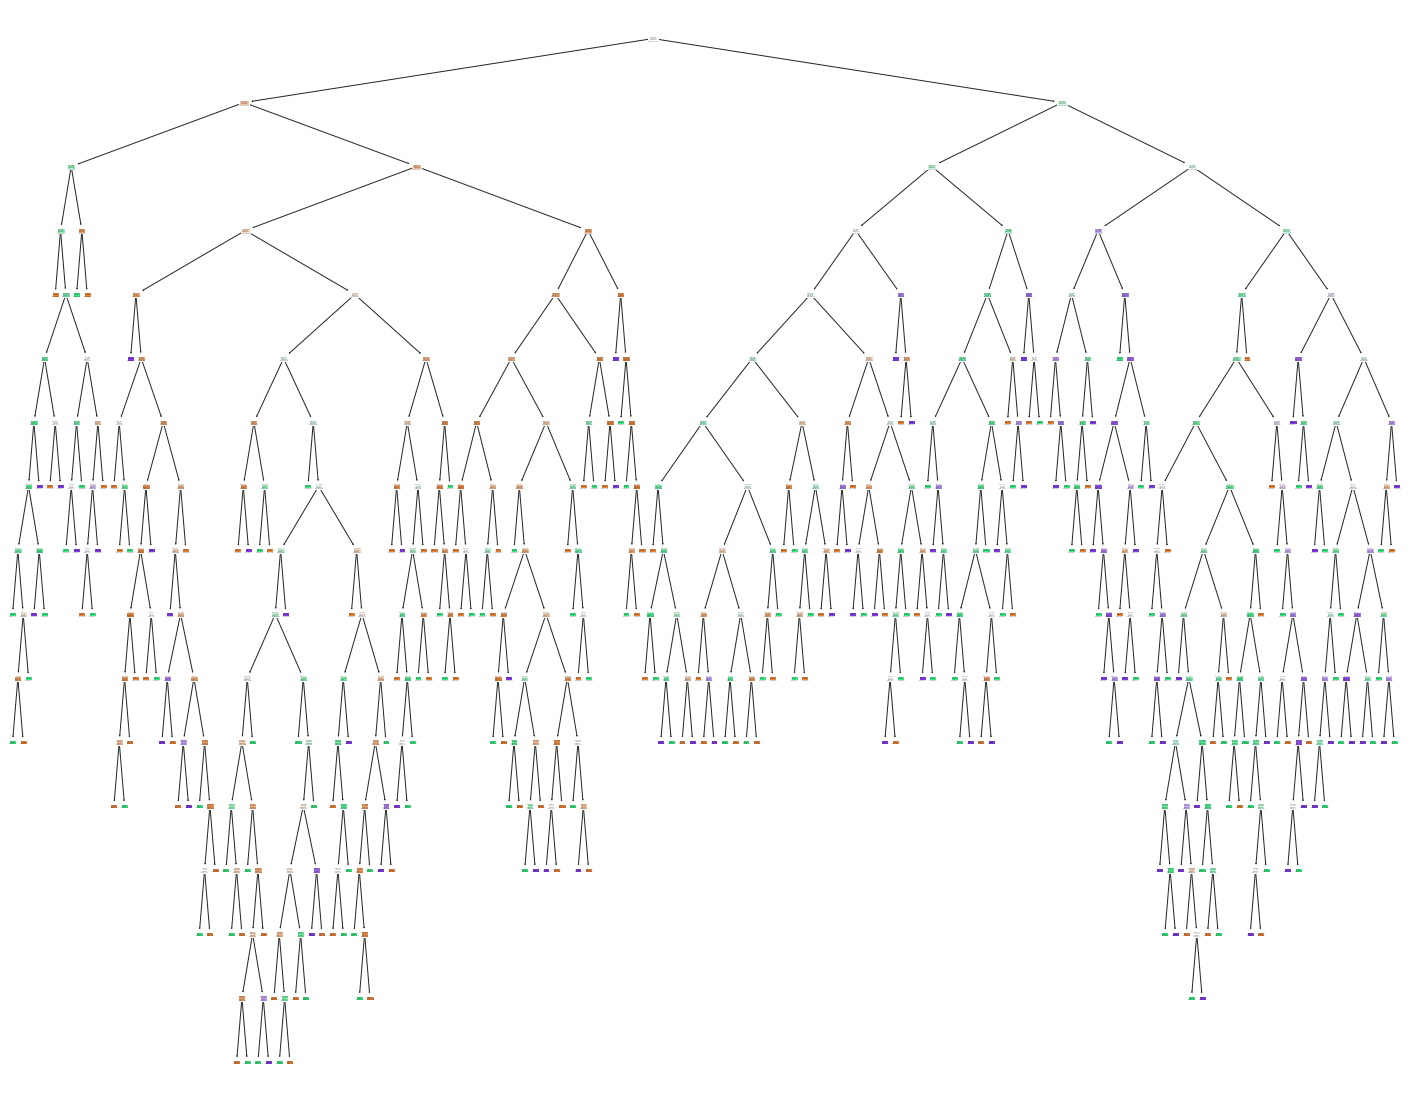

In [65]:
##visualising the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
clf = dtc.fit(X_train,y_train)
tree.plot_tree(clf,filled=True)
plt.show()

In [66]:
fig.savefig("decision tree.png")

# Logistic Regression

In [68]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [69]:
log_reg.fit(X_train1,y_train1)

LogisticRegression()

In [70]:
log_reg_pred = log_reg.predict(X_test1)
log_reg_pred

array([9, 9, 9, 5, 5, 5, 9, 9, 9, 5, 5, 5, 9, 5, 9, 5, 9, 9, 5, 9, 5, 9,
       5, 9, 9, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 9, 9, 9, 5, 9,
       9, 5, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 9, 9, 5, 9, 9, 5, 9, 9, 5, 9,
       5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 9, 5, 5, 5, 9, 9,
       9, 5, 9, 5, 5, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 9, 5, 5, 9, 5, 9,
       9, 9, 9, 5, 5, 9, 5, 9, 5, 9, 5, 5, 5, 9, 9, 9, 9, 5, 5, 5, 5, 9,
       5, 5, 9, 5, 5, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 9, 9, 9, 9, 9, 5, 9,
       5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 9, 5, 9,
       9, 5, 9, 9, 9, 5, 5, 5, 5, 9, 5, 9, 9, 9, 9, 9, 5, 5, 9, 5, 9, 9,
       9, 9, 9, 5, 5, 9, 9, 9, 9, 5, 9, 5, 9, 9, 9, 5, 5, 5, 5, 9, 5, 5,
       5, 5, 5, 9, 9, 5, 9, 9, 9, 9, 5, 5, 5, 9, 5, 5, 5, 5, 9, 5, 5, 5,
       9, 9, 9, 5, 5, 9, 5, 5, 9, 5, 9, 5, 5, 9, 9, 5, 5, 9, 9, 9, 9, 9,
       5, 5, 9, 9, 5, 5, 5, 9, 5, 9, 5, 5, 9, 9, 5, 5, 9, 9, 5, 5, 5, 9,
       9, 9, 5, 5, 5, 5, 5, 9, 9, 5, 5, 5, 9, 5, 5,

In [71]:
print(classification_report(y_test1,log_reg_pred))

              precision    recall  f1-score   support

           5       0.51      0.64      0.57       145
           6       0.00      0.00      0.00       129
           9       0.30      0.71      0.42        66

    accuracy                           0.41       340
   macro avg       0.27      0.45      0.33       340
weighted avg       0.27      0.41      0.32       340



# Support Vector Classifier

In [72]:
svc = SVC()
svc

SVC()

In [73]:
svc.fit(X_train1,y_train1)

SVC()

In [74]:
svc_pred = svc.predict(X_test1)
svc_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [75]:
print(classification_report(y_test1,svc_pred))

              precision    recall  f1-score   support

           5       0.43      1.00      0.60       145
           6       0.00      0.00      0.00       129
           9       0.00      0.00      0.00        66

    accuracy                           0.43       340
   macro avg       0.14      0.33      0.20       340
weighted avg       0.18      0.43      0.26       340



# Random Forest Classifier

In [76]:
rand_for = RandomForestClassifier()
rand_for

RandomForestClassifier()

In [77]:
rand_for.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
rand_for_pred = rand_for.predict(X_test)
rand_for_pred

array([6, 5, 6, 5, 6, 5, 6, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 5, 9, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 9, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 9, 5, 5, 5, 6, 9, 5, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 9, 5, 5, 5, 5, 5, 6, 9,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 9, 5, 5, 5, 5, 9, 5, 6, 9, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       6, 6, 9, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 9, 5,
       6, 6, 6, 9, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 9, 5, 5, 5, 5, 6, 9,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 9, 5, 5,
       5, 6, 9, 9, 5, 6, 6, 5, 6, 5, 9, 6, 6, 9, 6, 9, 6, 9, 6, 6, 5, 9,
       6, 6, 6, 9, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 6, 5, 6, 9, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 9, 6, 6, 5, 6, 9, 5, 6,

In [79]:
print(classification_report(y_test,rand_for_pred))

              precision    recall  f1-score   support

           5       0.66      0.71      0.68       145
           6       0.53      0.61      0.57       129
           9       0.53      0.27      0.36        66

    accuracy                           0.59       340
   macro avg       0.57      0.53      0.54       340
weighted avg       0.58      0.59      0.58       340

